In [2]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

Number of annotated pixels (foreground): 1943


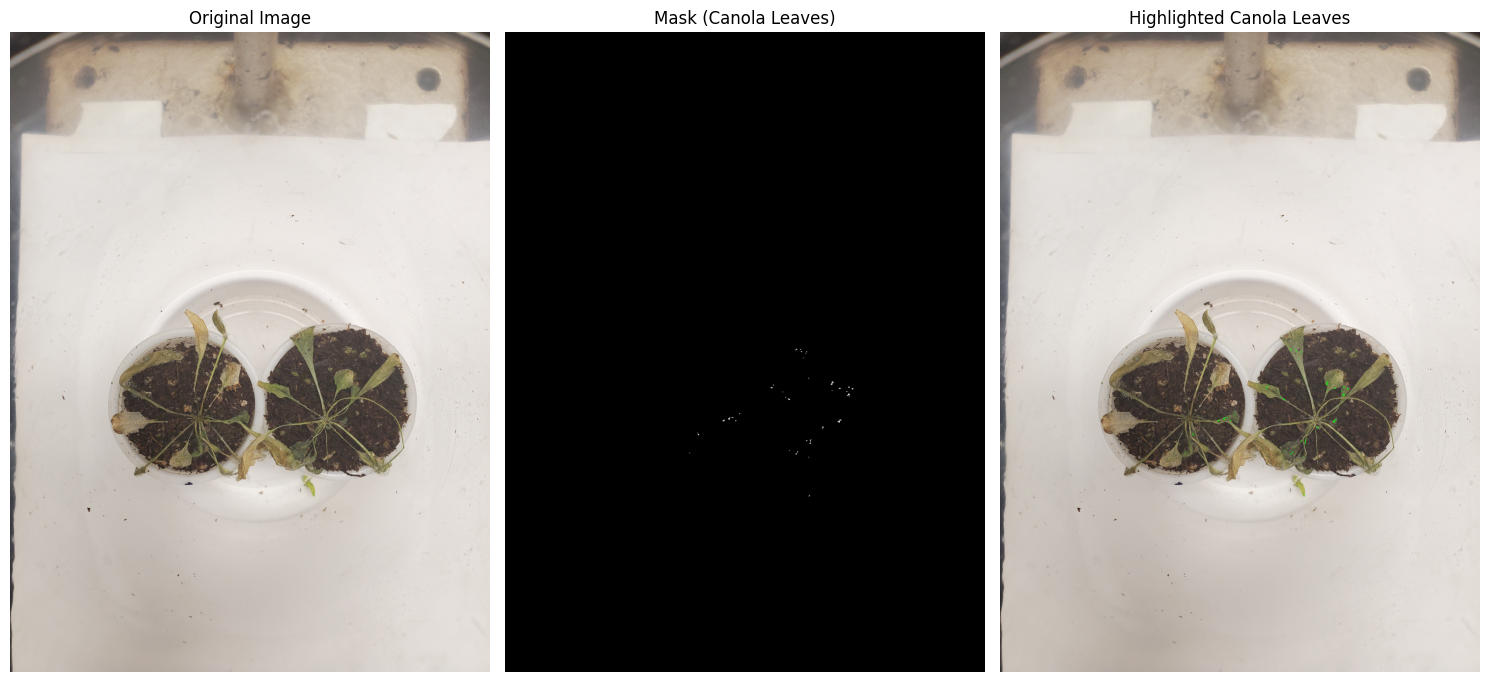

: 

In [24]:
# Step 1: Read the image
image = cv2.imread('20240503_094317.jpg')

# Convert BGR to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 2: Define the HSV range for detecting canola leaves (green parts)
lower_green = (35, 40, 40)   # Lower threshold for green in HSV
upper_green = (85, 255, 255)  # Upper threshold for green in HSV

# Step 3: Create the mask for the green areas (canola leaves)
mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Step 4: Optionally clean the mask using morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Step 4b: Count the number of annotated pixels (non-zero pixels in the mask)
annotated_pixel_count = np.count_nonzero(mask_clean)

# Print the count of annotated pixels
print(f"Number of annotated pixels (foreground): {annotated_pixel_count}")


# Step 5: Highlight the detected foreground (canola leaves) by overlaying a color on the mask
highlighted_image = image.copy()
highlighted_image[mask_clean > 0] = [0, 255, 0]  # Set green color on highlighted areas

# Step 6: Display the original image, mask, and highlighted image
# Convert BGR to RGB for displaying using matplotlib
original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_clean, cmap='gray')
plt.title('Mask (Canola Leaves)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(highlighted_image_rgb)
plt.title('Highlighted Canola Leaves')
plt.axis('off')

plt.tight_layout()
plt.show()


In [25]:

def img_annotation(file):
  # Step 1: Read the image
  image = cv2.imread(file)


  # Convert BGR to HSV color space
  hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

  # Step 2: Define the HSV range for detecting canola leaves (green and yellow parts)
  # Green range (for healthy leaves)
  lower_green = (35, 40, 40)   # Lower threshold for green in HSV
  upper_green = (85, 255, 255)  # Upper threshold for green in HSV

  # Yellow range (for older or diseased leaves)
  lower_yellow = (20, 40, 40)   # Lower threshold for yellow in HSV
  upper_yellow = (35, 255, 255)  # Upper threshold for yellow in HSV

  # Step 3: Create masks for both green and yellow areas (canola leaves)
  green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
  yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

  # Combine both masks
  mask_combined = cv2.bitwise_or(green_mask, yellow_mask)

  # Step 4: Optionally clean the mask using morphological operations
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
  mask_clean = cv2.morphologyEx(mask_combined, cv2.MORPH_OPEN, kernel)



  # Step 5: Remove small isolated areas (connected components analysis)
  # Find contours
  contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Create a new mask where only large enough areas are kept
  filtered_mask = np.zeros_like(mask_clean)

  # Define the minimum size threshold (100 pixels in this case)
  min_size = 50

  # Iterate over contours and filter based on the size
  for cnt in contours:
      area = cv2.contourArea(cnt)
      if area >= min_size:
          # Create a temporary mask for the contour
          temp_mask = np.zeros_like(mask_clean)
          cv2.drawContours(temp_mask, [cnt], 0, 255, -1)  # Fill the contour
          
          # Only keep areas that are in the original mask_clean
          filtered_mask = cv2.bitwise_or(filtered_mask, cv2.bitwise_and(temp_mask, mask_clean))

  # Step 6: Count the number of annotated pixels (non-zero pixels in the filtered mask)
  annotated_pixel_count = np.count_nonzero(filtered_mask)

  # Print the count of annotated pixels
  print(f"Number of annotated pixels (foreground): {annotated_pixel_count}")

  # Step 7: Highlight the detected foreground (canola leaves) by overlaying a color on the original image
  highlighted_image = image.copy()
  highlighted_image[filtered_mask > 0] = [0, 255, 0]  # Green for all valid canola leaves





  # # Step 4b: Count the number of annotated pixels (non-zero pixels in the mask)
  # annotated_pixel_count = np.count_nonzero(mask_clean)

  # # Print the count of annotated pixels
  # print(f"Number of annotated pixels (foreground): {annotated_pixel_count}")



  # # Step 5: Highlight the detected foreground (canola leaves) by overlaying a color on the mask
  # highlighted_image = image.copy()
  # highlighted_image[green_mask > 0] = [0, 255, 0]  # Green for healthy canola leaves
  # highlighted_image[yellow_mask > 0] = [0, 255, 255]  # Yellow for older or diseased canola leaves

  # Step 6: Display the original image, mask, and highlighted image
  # Convert BGR to RGB for displaying using matplotlib
  original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB)

  # Plot the images
  plt.figure(figsize=(15, 10))
  plt.subplot(1, 3, 1)
  plt.imshow(original_image_rgb)
  plt.title('Original Image')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(mask_clean, cmap='gray')
  plt.title('Mask (Canola Leaves)')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(highlighted_image_rgb)
  plt.title('Highlighted Canola Leaves (Green & Yellow)')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

  result = cv2.bitwise_and(image, image, mask=mask_combined)
  return result


Number of annotated pixels (foreground): 1566926


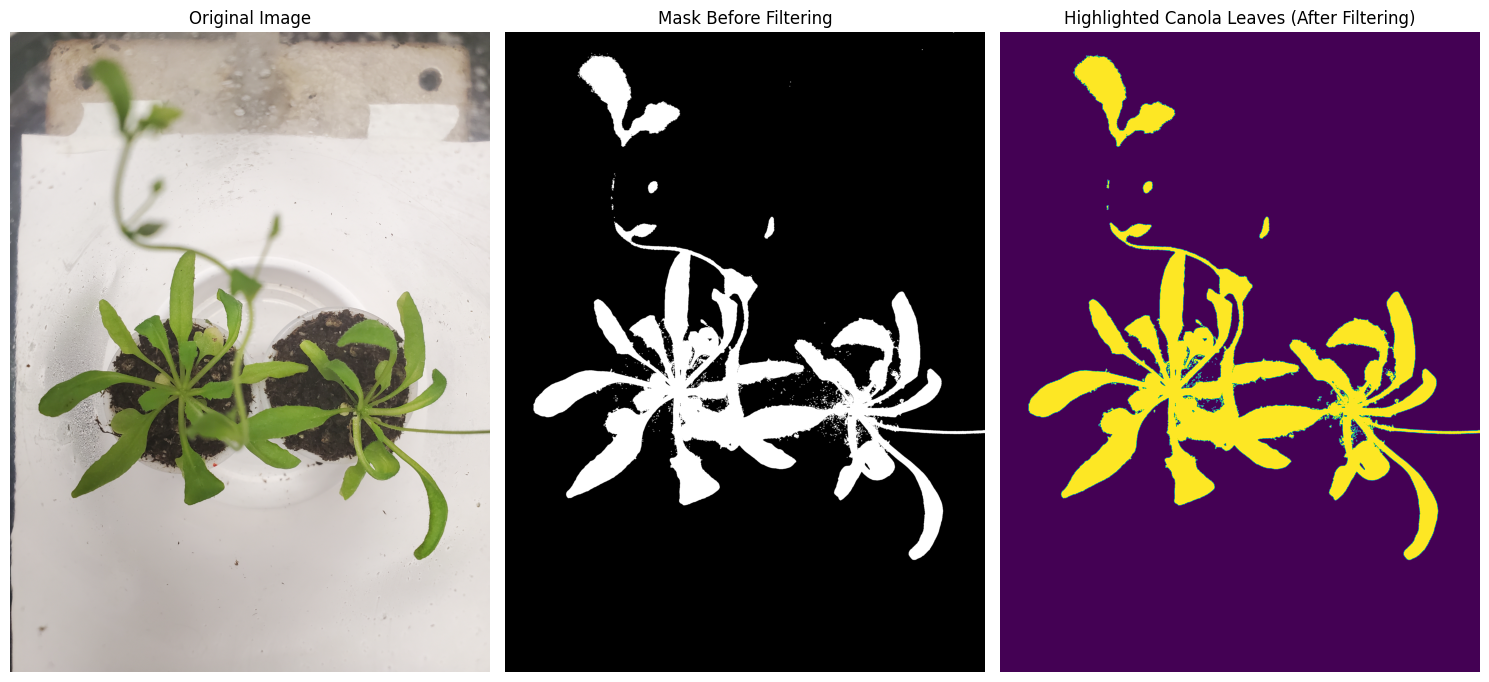

In [28]:
# Step 1: Read the image
image = cv2.imread('20240503_094143.jpg')

# Convert BGR to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 2: Define the HSV range for detecting canola leaves (green and yellow parts)
# Green range (for healthy leaves)
lower_green = (35, 40, 40)   # Lower threshold for green in HSV
upper_green = (85, 255, 255)  # Upper threshold for green in HSV

# Yellow range (for older or diseased leaves)
lower_yellow = (20, 40, 40)   # Lower threshold for yellow in HSV
upper_yellow = (35, 255, 255)  # Upper threshold for yellow in HSV

# Step 3: Create masks for both green and yellow areas (canola leaves)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Combine both masks
mask_combined = cv2.bitwise_or(green_mask, yellow_mask)

# Step 4: Optionally clean the mask using morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_clean = cv2.morphologyEx(mask_combined, cv2.MORPH_OPEN, kernel)

# Step 5: Remove small isolated areas (connected components analysis)
# Find contours
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a new mask where only large enough areas are kept
filtered_mask = np.zeros_like(mask_clean)

# Define the minimum size threshold (100 pixels in this case)
min_size = 100

# Iterate over contours and filter based on the size
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area >= min_size:
        # Create a temporary mask for the contour
        temp_mask = np.zeros_like(mask_clean)
        cv2.drawContours(temp_mask, [cnt], 0, 255, -1)  # Fill the contour
        
        # Only keep areas that are in the original mask_clean
        filtered_mask = cv2.bitwise_or(filtered_mask, cv2.bitwise_and(temp_mask, mask_clean))

# Step 6: Count the number of annotated pixels (non-zero pixels in the filtered mask)
annotated_pixel_count = np.count_nonzero(filtered_mask)

# Print the count of annotated pixels
print(f"Number of annotated pixels (foreground): {annotated_pixel_count}")

# Step 7: Highlight the detected foreground (canola leaves) by overlaying a color on the original image
highlighted_image = image.copy()
highlighted_image[filtered_mask > 0] = [0, 255, 0]  # Green for all valid canola leaves

# Step 8: Display the original image, mask, and highlighted image
# Convert BGR to RGB for displaying using matplotlib
original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_clean, cmap='gray')
plt.title('Mask Before Filtering')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_mask)
plt.title('Highlighted Canola Leaves (After Filtering)')
plt.axis('off')

plt.tight_layout()
plt.show()


Number of annotated pixels (foreground): 1569040


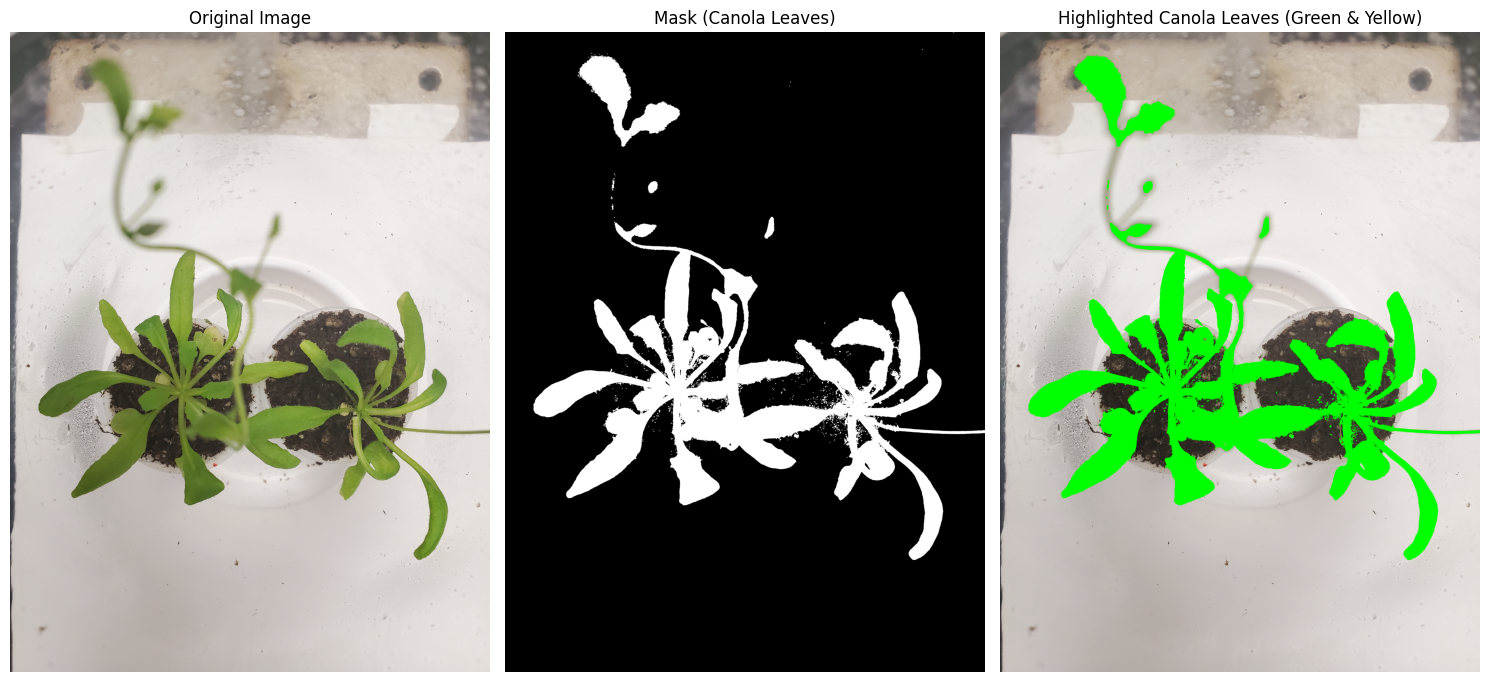

In [26]:
result = img_annotation('20240503_094143.jpg')

Number of annotated pixels (foreground): 291079


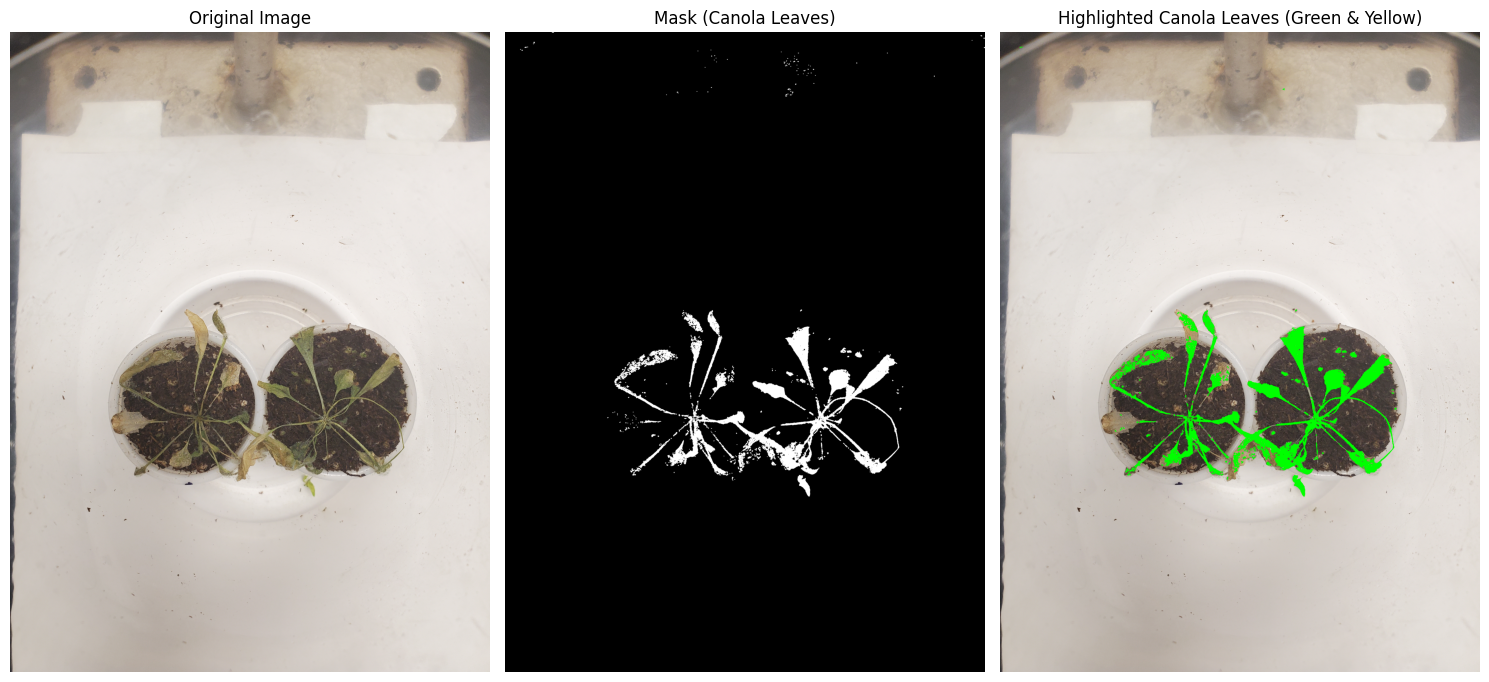

In [29]:
result = img_annotation('20240503_094317.jpg')

In [5]:
import cv2

# Load the image
image = cv2.imread('cropped2.png')

# Convert image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply CLAHE to the L-channel (brightness)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
cl = clahe.apply(l_channel)

# Merge the CLAHE-enhanced L-channel with the original a and b channels
lab_image_clahe = cv2.merge((cl, a_channel, b_channel))

# Convert back to BGR color space
contrast_enhanced_image = cv2.cvtColor(lab_image_clahe, cv2.COLOR_LAB2BGR)

# Display the contrast-enhanced image
cv2.imwrite('contrast_enhanced_image.jpg', contrast_enhanced_image)


True

Tan color #9D8967 in HSV: [ 19  88 157]
Number of annotated pixels (foreground): 408963


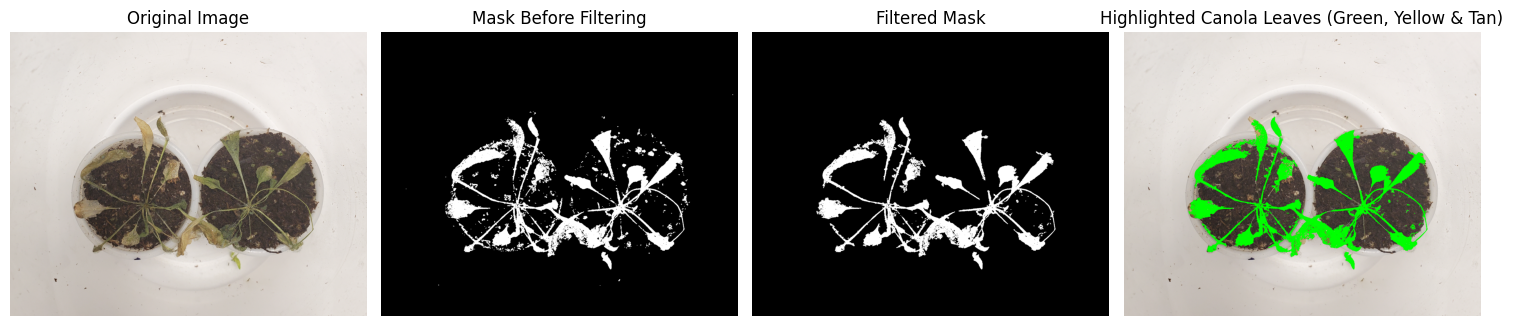

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the image
image = cv2.imread('img/cropped.png')

# Convert BGR to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 2: Define the HSV range for detecting canola leaves (green, yellow, and tan parts)
# Green range (for healthy leaves)
lower_green = (35, 40, 40)   # Lower threshold for green in HSV
upper_green = (85, 255, 255)  # Upper threshold for green in HSV

# Yellow range (for older or diseased leaves)
lower_yellow = (20, 40, 40)   # Lower threshold for yellow in HSV
upper_yellow = (35, 255, 255)  # Upper threshold for yellow in HSV


# Convert hex color #9D8967 (tan color) to BGR and then to HSV
tan_bgr = np.uint8([[[103, 137, 157]]])  # Hex #9D8967 in BGR
tan_hsv = cv2.cvtColor(tan_bgr, cv2.COLOR_BGR2HSV)

# Print the HSV value of the tan color
print(f"Tan color #9D8967 in HSV: {tan_hsv[0][0]}")

# Use the tan HSV value to define a range around it
hue = int(tan_hsv[0][0][0])
sat = int(tan_hsv[0][0][1])
val = int(tan_hsv[0][0][2])

# Define the lower and upper ranges for the tan color
lower_tan = (hue - 10, max(0, sat - 40), int(0.35 * 255))  # Ensure values don't go below 0
upper_tan = (hue + 10, min(255, sat + 40), int(0.72 * 255))  # Ensure values don't exceed 255

# Step 3: Create masks for green, yellow, and tan areas (canola leaves)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
tan_mask = cv2.inRange(hsv_image, lower_tan, upper_tan)

# Combine all masks
mask_combined = cv2.bitwise_or(green_mask, yellow_mask)
mask_combined = cv2.bitwise_or(mask_combined, tan_mask)

# Step 4: Optionally clean the mask using morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_clean = cv2.morphologyEx(mask_combined, cv2.MORPH_OPEN, kernel)



# Step 5: Remove small isolated areas (connected components analysis)
# Find contours
contours, _ = cv2.findContours(mask_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a new mask where only large enough areas are kept
filtered_mask = np.zeros_like(mask_clean)

# Define the minimum size threshold (100 pixels in this case)
min_size = 3500

# Iterate over contours and filter based on the size
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area >= min_size:
        # Create a temporary mask for the contour
        temp_mask = np.zeros_like(mask_clean)
        cv2.drawContours(temp_mask, [cnt], 0, 255, -1)  # Fill the contour
        
        # Only keep areas that are in the original mask_clean
        filtered_mask = cv2.bitwise_or(filtered_mask, cv2.bitwise_and(temp_mask, mask_clean))

# Step 6: Count the number of annotated pixels (non-zero pixels in the filtered mask)
annotated_pixel_count = np.count_nonzero(filtered_mask)

# Print the count of annotated pixels
print(f"Number of annotated pixels (foreground): {annotated_pixel_count}")



# Step 7: Highlight the detected foreground (canola leaves) by overlaying colors on the original image
highlighted_image = image.copy()
highlighted_image[filtered_mask > 0] = [0, 255, 0]  # Green for healthy canola leaves
# highlighted_image[yellow_mask > 0] = [0, 255, 255]  # Yellow for bright yellow leaves
# highlighted_image[tan_mask > 0] = [0, 200, 200]  # Tan for older/diseased leaves

# Step 8: Display the original image, mask, and highlighted image
# Convert BGR to RGB for displaying using matplotlib
original_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB)

# Plot the images
plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.imshow(original_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(mask_clean, cmap='gray')
plt.title('Mask Before Filtering')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(filtered_mask, cmap='gray')
plt.title('Filtered Mask')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(highlighted_image_rgb)
plt.title('Highlighted Canola Leaves (Green, Yellow & Tan)')
plt.axis('off')

plt.tight_layout()
plt.show()


Tan color #9D8967 in HSV: [ 19  88 157]


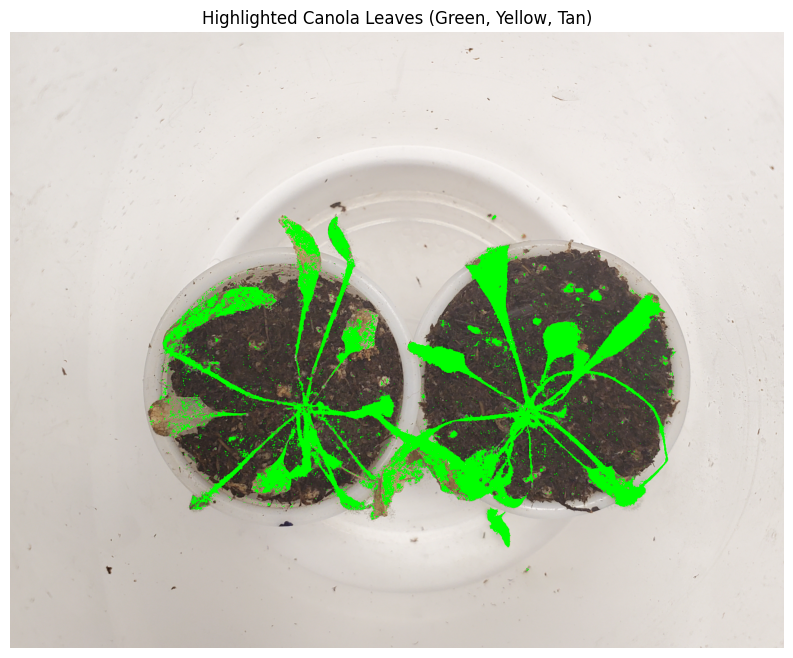

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read and downscale the image for faster processing
image = cv2.imread('img/cropped.png')
scale_percent = 50  # Scale down to speed up processing; adjust as needed
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

# Convert BGR to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Step 2: Define HSV ranges for colors
# Updated broader ranges for tan to capture all leaf parts
lower_green = (35, 40, 40)
upper_green = (85, 255, 255)
lower_yellow = (20, 40, 40)
upper_yellow = (35, 255, 255)


# Convert hex color #9D8967 (tan color) to BGR and then to HSV
tan_bgr = np.uint8([[[103, 137, 157]]])  # Hex #9D8967 in BGR
tan_hsv = cv2.cvtColor(tan_bgr, cv2.COLOR_BGR2HSV)

# Print the HSV value of the tan color
print(f"Tan color #9D8967 in HSV: {tan_hsv[0][0]}")

# Use the tan HSV value to define a range around it
hue = int(tan_hsv[0][0][0])
sat = int(tan_hsv[0][0][1])
val = int(tan_hsv[0][0][2])

# Tan color range adjustments, including up to hsl(33deg, 25%, 50%)
lower_darker_tan = (23, 30, 40)  # Broadened to capture darker tans
upper_darker_tan = (43, int(0.45 * 255), int(0.65 * 255))  # Include colors up to 65% in value

lower_lighter_tan = (23, 10, int(0.50 * 255))  # Broadened to capture lighter tan hues
upper_lighter_tan = (43, int(0.45 * 255), int(0.78 * 255))  # Upper limit for lighter tan


# Step 3: Create masks for green, yellow, and tan areas (canola leaves)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
darker_tan_mask = cv2.inRange(hsv_image, lower_darker_tan, upper_darker_tan)
lighter_tan_mask = cv2.inRange(hsv_image, lower_lighter_tan, upper_lighter_tan)

# Combine masks for tan colors
initial_mask = cv2.bitwise_or(green_mask, yellow_mask)
initial_mask = cv2.bitwise_or(initial_mask, darker_tan_mask)
initial_mask = cv2.bitwise_or(initial_mask, lighter_tan_mask)

# Step 4: Clean the initial mask with larger morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))  # Larger kernel for better connectivity
mask_clean = cv2.morphologyEx(initial_mask, cv2.MORPH_CLOSE, kernel)

# Step 5: Connected component analysis for lighter tan to check connectivity with darker tan
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(lighter_tan_mask, connectivity=8)
filtered_mask = np.zeros_like(lighter_tan_mask)

for label in range(1, num_labels):  # Skip background
    x, y, w, h, area = stats[label]
    if area < 500:  # Skip small areas directly
        continue

    component_mask = (labels == label).astype(np.uint8) * 255

    # Bounding box intersection for faster connectivity check
    roi_darker_tan = darker_tan_mask[y:y+h, x:x+w]
    roi_component = component_mask[y:y+h, x:x+w]

    if cv2.bitwise_and(roi_darker_tan, roi_component).any():
        filtered_mask = cv2.bitwise_or(filtered_mask, component_mask)

# Combine with green and yellow for the final mask
final_mask = cv2.bitwise_or(filtered_mask, cv2.bitwise_or(green_mask, yellow_mask))

# Resize final mask back to original dimensions for visualization
final_mask_large = cv2.resize(final_mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Step 6: Display results
highlighted_image = image.copy()
highlighted_image[final_mask_large > 0] = [0, 255, 0]  # Color the mask green
highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(highlighted_image_rgb)
plt.title("Highlighted Canola Leaves (Green, Yellow, Tan)")
plt.axis('off')
plt.show()


Number of annotated pixels (foreground): 1609236


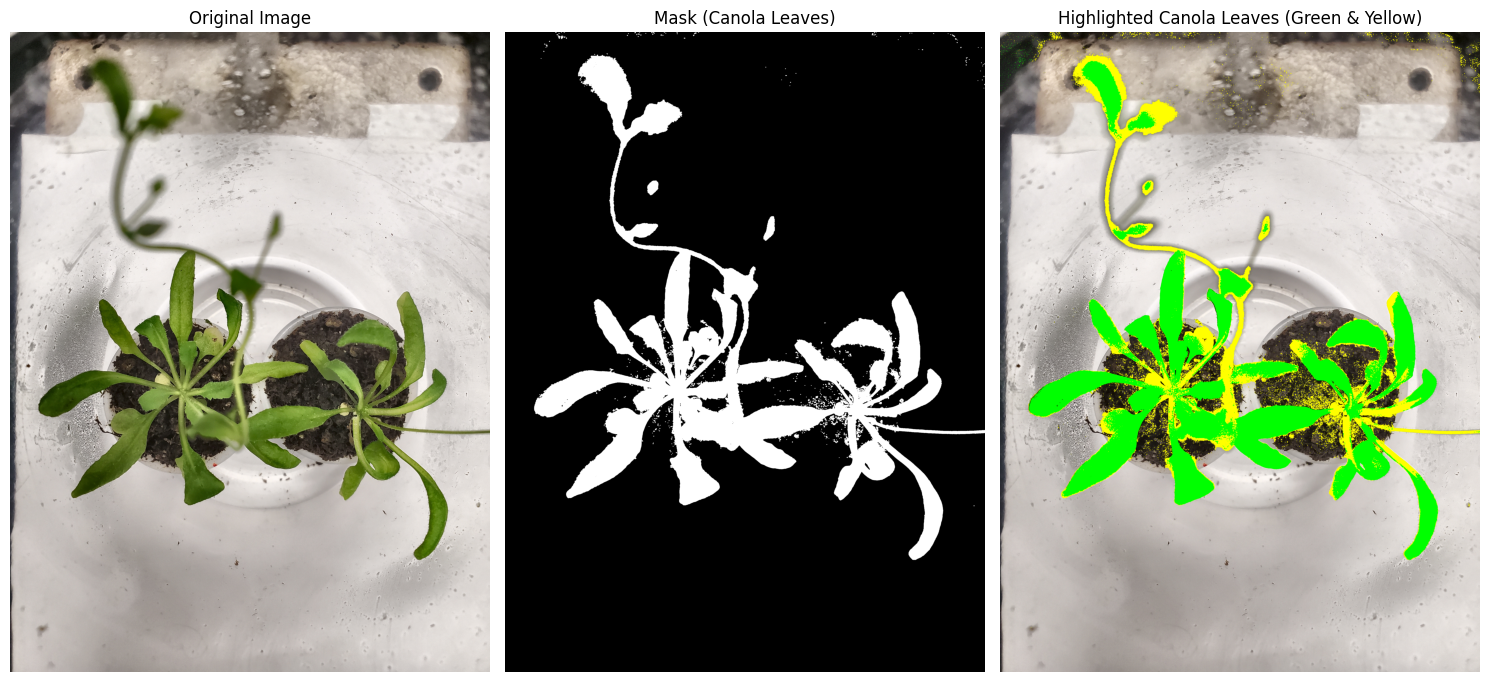

In [22]:
result = img_annotation('contrast_enhanced_image.jpg')

In [2]:
# import cv2
# import numpy as np

# Load the image
image = cv2.imread('20240503_094143.jpg')

# Gaussian blur the image
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Sharpen the image by subtracting the blurred image from the original
sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)

# Display the sharpened image
cv2.imwrite('Sharpened Image', sharpened)



2024-09-30 16:35:51.418 Python[14746:36360159] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import cv2

# Load the SAM model (make sure the model is downloaded)
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

# Use the color-thresholded mask as input
# Assume `image` is your original image and `color_thresholded_mask` is your mask from color thresholding
masks = mask_generator.generate(image, mask_input=filtered_mask)

# You can further refine or display the masks
for mask in masks:
    refined_mask = mask['segmentation']  # Refined mask from SAM
    # Display or use the refined mask
    cv2.imshow("Refined Mask", refined_mask)

In [69]:
from segment_anything import SamPredictor, sam_model_registry
import numpy as np
import cv2

# Load the SAM model
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

# Read the image
image = cv2.imread("cropped.png")

# Set the image for SAM to predict on
predictor.set_image(image)

# Use your color-thresholded mask to get bounding box for prompt
# Assume `color_thresholded_mask` is your binary mask from color thresholding
x, y, w, h = cv2.boundingRect(filtered_mask)

# Create the bounding box prompt
input_box = np.array([x, y, x + w, y + h])

# Run SAM with the bounding box prompt
masks, _, _ = predictor.predict(
    box=input_box,
    multimask_output=True
)

# Display the resulting mask
for i, mask in enumerate(masks):
    cv2.imshow(f"Mask {i}", mask.astype(np.uint8) * 255)

cv2.waitKey(0)
cv2.destroyAllWindows()


RuntimeError: Could not infer dtype of numpy.uint8

In [59]:
def get_crop_coordinates(cropped_image_path, original_image_path):
    cropped_img = cv2.imread(cropped_image_path)
    original_img = cv2.imread(original_image_path)
    
    if cropped_img is None or original_img is None:
        print("Failed to load one or both images for cropping coordinates.")
        return None
    
    # Get dimensions of the cropped and original images
    h_cropped, w_cropped = cropped_img.shape[:2]
    h_original, w_original = original_img.shape[:2]
    
    # Assuming the cropped region is centered, calculate coordinates
    x_start = (w_original - w_cropped) // 2
    y_start = (h_original - h_cropped) // 2
    x_end = x_start + w_cropped
    y_end = y_start + h_cropped
    
    return (x_start, y_start, x_end, y_end)

In [63]:
get_crop_coordinates('094437_crop.png', 'img/20240503_094437.jpg')

(834, 1261, 2190, 2771)